## 1. Winter is Coming. Let's load the dataset ASAP!
<p>If you haven't heard of <em>Game of Thrones</em>, then you must be really good at hiding. Game of Thrones is the hugely popular television series by HBO based on the (also) hugely popular book series <em>A Song of Ice and Fire</em> by George R.R. Martin. In this notebook, we will analyze the co-occurrence network of the characters in the  Game of Thrones books. Here, two characters are considered to co-occur if their names appear in the vicinity of 15 words from one another in the books. </p>
<p><img src="https://assets.datacamp.com/production/project_76/img/got_network.jpeg" style="width: 550px"></p>
<p>This dataset constitutes a network and is given as a text file describing the <em>edges</em> between characters, with some attributes attached to each edge. Let's start by loading in the data for the first book <em>A Game of Thrones</em> and inspect it.</p>

In [5]:
# Importing modules
import networkx as nx
#NetworkX: For working with complex networks or graphs.

import pandas as pd
#Pandas: For data manipulation and analysis, especially with structured data.

import matplotlib.pyplot as plt
#Matplotlib: For creating various types of plots and visualizations to analyze data.

In [6]:
import io    
# import io: line imports the io module, which provides core tools for working with streams of data in Python. 
# It allows you to read from and write to various types of input/output streams, such as strings, files, and bytes.

%cd '/Users/coolr/Dropbox/PC/Desktop/Network part-2'
# %cd command is used to change the current working directory (cwd) within the notebook or IPython session. 
# In this case, it changes the current working directory to '/Users/coolr/Dropbox/PC/Desktop/Network part-2'.
# This directory path refers to a specific location in the file system where the user wants to work with files or data

[WinError 3] The system cannot find the path specified: "'/Users/coolr/Dropbox/PC/Desktop/Network part-2'"
C:\Users\coolr


In [7]:
# Reading in datasets/book1.csv
book1 = pd.read_csv('book1.csv')

In [8]:
# Printing out the head of the dataset of top 5.
print(book1.head())

                            Source              Target        Type  weight  \
0                   Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                   Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   

   book  
0     1  
1     1  
2     1  
3     1  
4     1  


In [9]:
# Printing out the tail of the dataset of bottom 5
print(book1.tail())

               Source           Target        Type  weight  book
679  Tyrion-Lannister      Willis-Wode  Undirected       4     1
680  Tyrion-Lannister            Yoren  Undirected      10     1
681   Tywin-Lannister            Varys  Undirected       4     1
682   Tywin-Lannister      Walder-Frey  Undirected       8     1
683      Waymar-Royce  Will-(prologue)  Undirected      18     1


## 2. Time for some Network of Thrones
<p>The resulting DataFrame <code>book1</code> has 5 columns: <code>Source</code>, <code>Target</code>, <code>Type</code>, <code>weight</code>, and <code>book</code>. Source and target are the two nodes that are linked by an edge. A network can have directed or undirected edges and in this network all the edges are undirected. The weight attribute of every edge tells us the number of interactions that the characters have had over the book, and the book column tells us the book number.</p>
<p>Once we have the data loaded as a pandas DataFrame, it's time to create a network. We will use <code>networkx</code>, a network analysis library, and create a graph object for the first book.</p>

In [10]:
# Importing modules
import networkx as nx

# Creating an empty graph object
G_book1 = nx.Graph()

## 3. Populate the network with the DataFrame
<p>Currently, the graph object <code>G_book1</code> is empty. Let's now populate it with the edges from <code>book1</code>. And while we're at it, let's load in the rest of the books too!</p>

In [17]:
# Iterating through the DataFrame to add edges
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

# Creating a list of networks for all the books
books = [G_book1]
book_fnames = ['book2.csv', 'book3.csv', 'book4.csv', 'book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)
    
    # In conclusion, this code utilizes the NetworkX library to build network graphs for each book 
    # in the Game of Thrones series by reading edge data from CSV files that correlate to the different books. 
    # The weight of the edges indicates the frequency of interactions. Each graph depicts the interactions (edges) 
    # between characters (nodes) in a specific a book.
    

In [18]:
print(book1.describe())  # Display basic statistics of the DataFrame 'df'

           weight   book
count  684.000000  684.0
mean    10.769006    1.0
std     17.294432    0.0
min      3.000000    1.0
25%      4.000000    1.0
50%      5.000000    1.0
75%     11.000000    1.0
max    291.000000    1.0


In [23]:
print(book1.shape)

(684, 5)


## 4. The most important character in Game of Thrones
<p>Is it Jon Snow, Tyrion, Daenerys, or someone else? Let's see! Network science offers us many different metrics to measure the importance of a node in a network. Note that there is no "correct" way of calculating the most important node in a network, every metric has a different meaning.</p>
<p>First, let's measure the importance of a node in a network by looking at the number of neighbors it has, that is, the number of nodes it is connected to. For example, an influential account on Twitter, where the follower-followee relationship forms the network, is an account which has a high number of followers. This measure of importance is called <em>degree centrality</em>.</p>
<p>Using this measure, let's extract the top ten important characters from the first book (<code>book[0]</code>) and the fifth book (<code>book[4]</code>).</p>

In [8]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(books[0])

# Calculating the degree centrality of book 5
deg_cen_book5 = nx.degree_centrality(books[4])

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book1 =  sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book5 =  sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:10]

# Printing out the top 10 of book1 and book5
print(sorted_deg_cen_book1)
print(sorted_deg_cen_book5)

# The above code segment allows us to identify top 10 character in terms of degree of centrality, which will give us most
# connected characters with in each book network.

[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)]
[('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


## 5. The evolution of character importance
<p>According to degree centrality, the most important character in the first book is Eddard Stark but he is not even in the top 10 of the fifth book. The importance of characters changes over the course of five books because, you know, stuff happens... ;)</p>
<p>Let's look at the evolution of degree centrality of a couple of characters like Eddard Stark, Jon Snow, and Tyrion, which showed up in the top 10 of degree centrality in the first book.</p>

<AxesSubplot: >

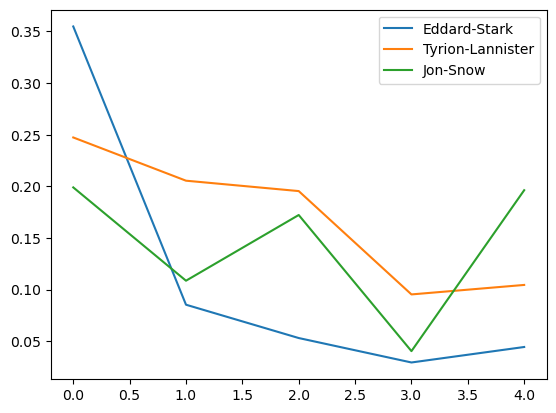

In [9]:
%matplotlib inline 
# this commond allows us to plots to be displayed inline within the notebook.

# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

## 6. What's up with Stannis Baratheon?
<p>We can see that the importance of Eddard Stark dies off as the book series progresses. With Jon Snow, there is a drop in the fourth book but a sudden rise in the fifth book.</p>
<p>Now let's look at various other measures like <em>betweenness centrality</em> and <em>PageRank</em> to find important characters in our Game of Thrones character co-occurrence network and see if we can uncover some more interesting facts about this network. Let's plot the evolution of betweenness centrality of this network over the five books. We will take the evolution of the top four characters of every book and plot it.</p>

<AxesSubplot: >

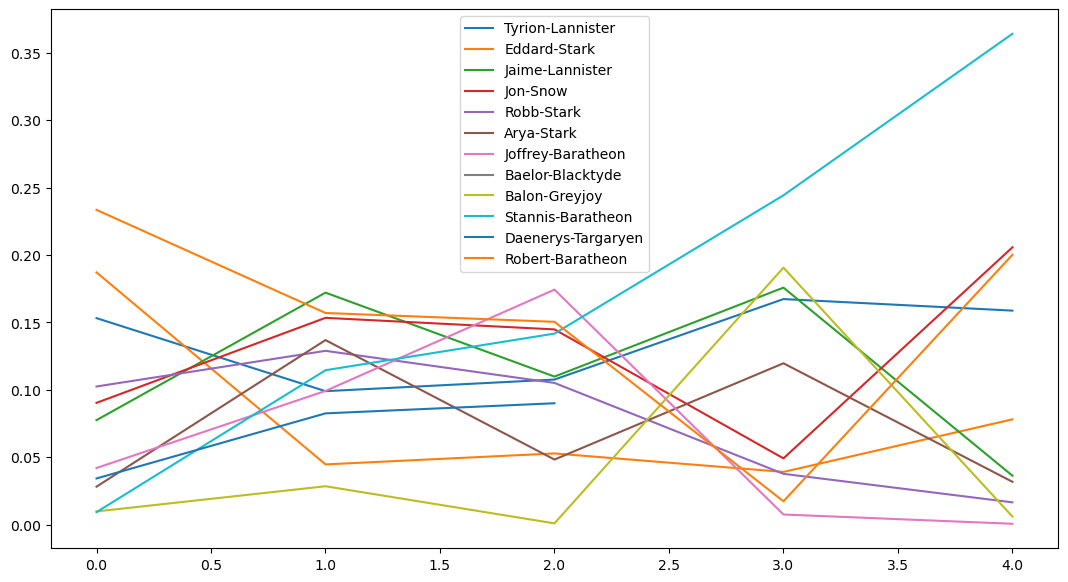

In [10]:
# Creating a list of betweenness centrality of all the books just like we did for degree centrality
evol = [nx.betweenness_centrality(book, weight='weight') for book in books]

# Making a DataFrame from the list
betweenness_evol_df = pd.DataFrame.from_records(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the evolution of the top characters
betweenness_evol_df[list_of_char].plot(figsize=(13, 7))

# This code segment analyzes the evolution of the top characters' betweenness centrality values across 
# multiple books in the series,providing valuable insights into the characters' roles in connecting 
# different parts of the network.

## 7. What does Google PageRank tell us about GoT?
<p>We see a peculiar rise in the importance of Stannis Baratheon over the books. In the fifth book, he is significantly more important than other characters in the network, even though he is the third most important character according to degree centrality.</p>
<p>PageRank was the initial way Google ranked web pages. It evaluates the inlinks and outlinks of webpages in the world wide web, which is, essentially, a directed network. Let's look at the importance of characters in the Game of Thrones network according to PageRank. </p>

<AxesSubplot: >

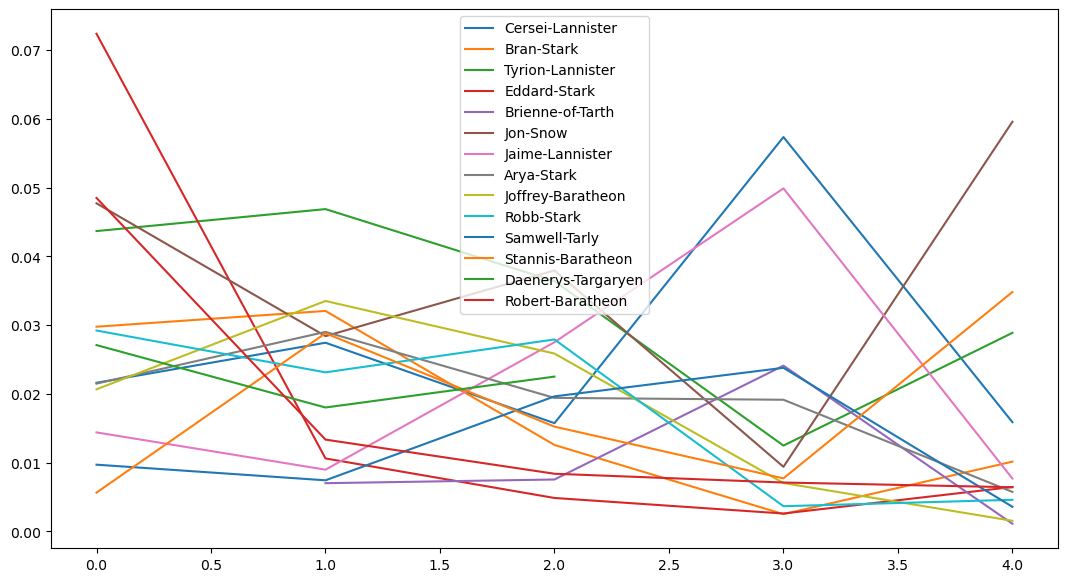

In [11]:
# Creating a list of pagerank of all the characters in all the books
evol = [nx.pagerank(book) for book in books]

# Making a DataFrame from the list
pagerank_evol_df = pd.DataFrame.from_records(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the top characters
pagerank_evol_df[list_of_char].plot(figsize=(13, 7))
# This code segment analyzes the evolution of the top characters' PageRank values across multiple books in the series,
# providing valuable insights into the characters' overall importance in the network.

## 8. Correlation between different measures
<p>Stannis, Jon Snow, and Daenerys are the most important characters in the fifth book according to PageRank. Eddard Stark follows a similar curve but for degree centrality and betweenness centrality: He is important in the first book but dies into oblivion over the book series.</p>
<p>We have seen three different measures to calculate the importance of a node in a network, and all of them tells us something about the characters and their importance in the co-occurrence network. We see some names pop up in all three measures so maybe there is a strong correlation between them?</p>
<p>Let's look at the correlation between PageRank, betweenness centrality and degree centrality for the fifth book using Pearson correlation.</p>

In [12]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)

# Calculating the correlation
cor.T.corr()

# This code segment analyzes the correlation between different centrality measures (PageRank, betweenness centrality, 
# and degree centrality) for characters in the fifth book of the series.The correlation matrix provides insights into whether 
# these measures tend to agree or disagree in identifying important characters within the network.

,0,1,2
0,1.000000,0.793372,0.971493
1,0.793372,1.000000,0.833816
2,0.971493,0.833816,1.000000


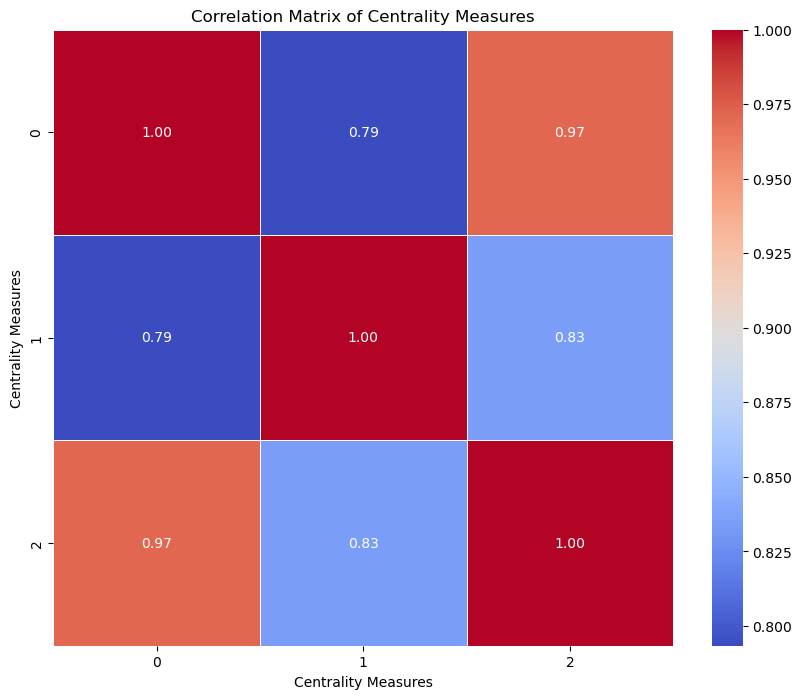

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cor.T.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Centrality Measures')
plt.xlabel('Centrality Measures')
plt.ylabel('Centrality Measures')
plt.show()
# Plot shows the correlation matrix of centrality measures of heatmap 


## 9. Conclusion
<p>We see a high correlation between these three measures for our character co-occurrence network.</p>
<p>So we've been looking at different ways to find the important characters in the Game of Thrones co-occurrence network. According to degree centrality, Eddard Stark is the most important character initially in the books. But who is/are the most important character(s) in the fifth book according to these three measures? </p>

In [14]:
# Finding the most important character in the fifth book,  
# according to degree centrality, betweenness centrality and pagerank.
p_rank, b_cent, d_cent = cor.idxmax(axis=1)

# Printing out the top character accoding to the three measures
print(p_rank, b_cent)

Jon-Snow Stannis-Baratheon


# 10.Community Detection

In [15]:
# Community Detection
communities = nx.algorithms.community.greedy_modularity_communities(books[0])
print("Communities in Book 1:")
for i, community in enumerate(communities):
    print(f"Community {i+1}: {community}")
    
    # Overall, this code snippet provides insight into the community structure of the network of characters in Book 1 
    # of the Game of Thrones series.It helps in understanding how characters are grouped together based on their 
    # interactions and connections within the narrative.

Communities in Book 1:
Community 1: frozenset({'Joseth', 'Stiv', 'Bran-Stark', 'Kevan-Lannister', 'Catelyn-Stark', 'Jory-Cassel', 'Masha-Heddle', 'Edmure-Tully', 'Rickard-Karstark', 'Jaime-Lannister', 'Heward', 'Robb-Stark', 'Harys-Swyft', 'Eon-Hunter', 'Rickon-Stark', 'Morrec', 'Mord', 'Galbart-Glover', 'Robert-Arryn', 'Addam-Marbrand', 'Tywin-Lannister', 'Hallis-Mollen', 'Leo-Lefford', 'Jon-Umber-(Greatjon)', 'Kurleket', 'Rodrik-Cassel', 'Lyn-Corbray', 'Donnel-Waynwood', 'Gunthor-son-of-Gurn', 'Shae', 'Hoster-Tully', 'Nestor-Royce', 'Maege-Mormont', 'Luwin', 'Willis-Wode', 'Theon-Greyjoy', 'Hali', 'Tyrion-Lannister', 'Walder-Frey', 'Vardis-Egen', 'Wyl-(guard)', 'Jonos-Bracken', 'Mychel-Redfort', 'Brynden-Tully', 'Osha', 'Moreo-Tumitis', 'Colemon', 'Lysa-Arryn', 'Jyck', 'Wendel-Manderly', 'Hodor', 'Tytos-Blackwood', 'Chiggen', 'Hullen', 'Roose-Bolton', 'Bronn', 'Nan', 'Stevron-Frey', 'Chella', 'Mya-Stone', 'Marillion'})
Community 2: frozenset({'Sansa-Stark', 'Beric-Dondarrion', 'Arya-

# 11.Centrality Measures 

In [16]:
# Centrality Measures
closeness_centrality_book1 = nx.closeness_centrality(books[0])
sorted_closeness_centrality_book1 = sorted(closeness_centrality_book1.items(), key=lambda x: x[1], reverse=True)
print("Top 10 characters by closeness centrality in Book 1:")
print(sorted_closeness_centrality_book1[:10])
# This code snippet provides insight into which characters in Book 1 are most central in terms of 
# their proximity to other characters in the network.
# It helps in understanding which characters are likely to have the most influence or interactions within the narrative.

Top 10 characters by closeness centrality in Book 1:
[('Eddard-Stark', 0.5636363636363636), ('Robert-Baratheon', 0.5454545454545454), ('Tyrion-Lannister', 0.510989010989011), ('Catelyn-Stark', 0.5054347826086957), ('Robb-Stark', 0.49732620320855614), ('Jon-Snow', 0.493368700265252), ('Sansa-Stark', 0.48947368421052634), ('Bran-Stark', 0.4869109947643979), ('Cersei-Lannister', 0.484375), ('Joffrey-Baratheon', 0.4806201550387597)]


# 12.Character Relationships

In [17]:
# Character Relationships
shortest_path = nx.shortest_path(books[0], source='Eddard-Stark', target='Jon-Snow')
print("Shortest path between Eddard Stark and Jon Snow in Book 1:", shortest_path)

Shortest path between Eddard Stark and Jon Snow in Book 1: ['Eddard-Stark', 'Jon-Snow']


# 13.Degree Centrality

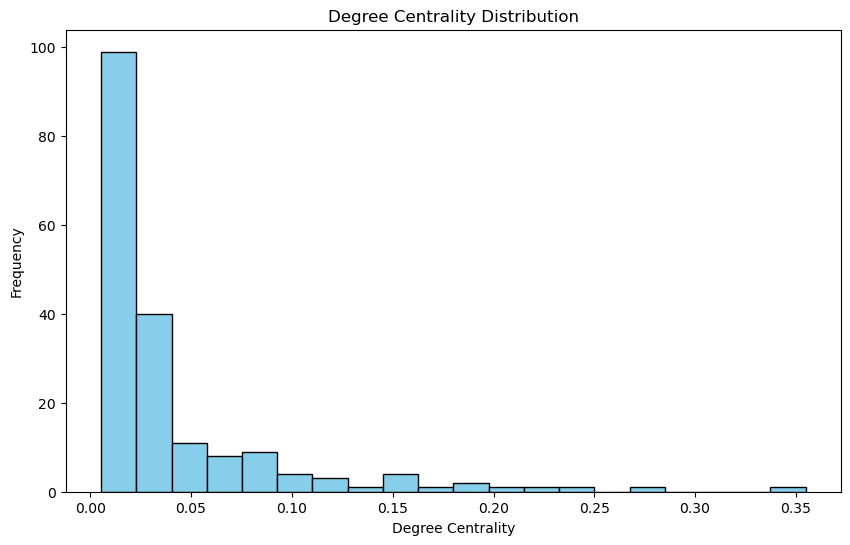

In [18]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'G_book1' is the network graph object for the first book

# Degree Centrality
degree_centrality = nx.degree_centrality(G_book1)
degree_values = list(degree_centrality.values())

# Plotting Degree Distribution
plt.figure(figsize=(10, 6))
plt.hist(degree_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.show()


# Overall, this code calculates the degree centrality for each node in the graph and then plots a 
# histogram showing the distribution of degree centrality values across all nodes in the graph. 
# This visualization helps in understanding the centrality distribution and identifying the most central nodes in the network.

# 14. Computing Degree Centrality Statistics

In [19]:
# Computing Degree Centrality Statistics
degree_range = max(degree_values) - min(degree_values)
degree_mean = sum(degree_values) / len(degree_values)
degree_median = pd.Series(degree_values).median()

print(f"Degree Centrality Range: {degree_range}")
print(f"Degree Centrality Mean: {degree_mean}")
print(f"Degree Centrality Median: {degree_median}")

# Overall, this code computes and prints the range, mean, and median of the degree centrality values, 
# providing insights into the distribution and central tendency of node centrality in the network. 
# These statistics help in understanding the overall structure and connectivity of the network.

Degree Centrality Range: 0.34946236559139787
Degree Centrality Mean: 0.039330688287045196
Degree Centrality Median: 0.021505376344086023


# 15.Betweenness Centrality

In [20]:
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G_book1, weight='weight')
betweenness_values = list(betweenness_centrality.values())

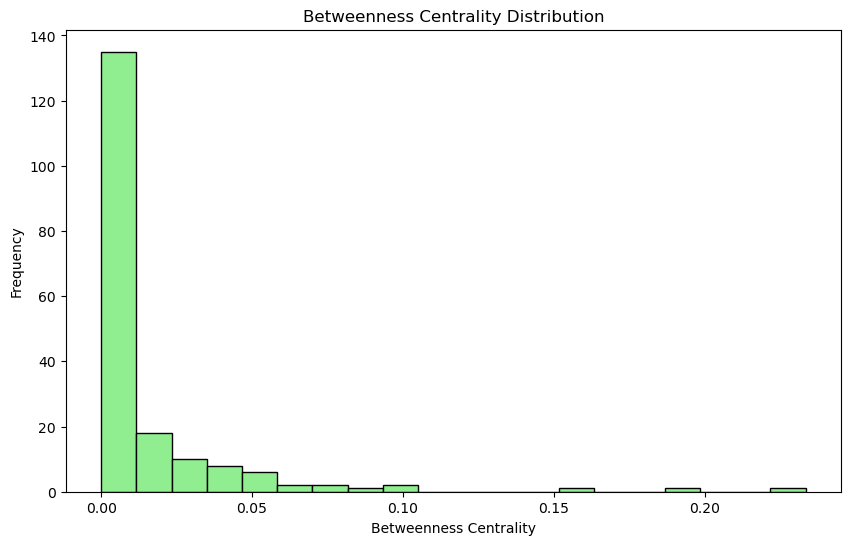

In [21]:
# Plotting Betweenness Centrality Distribution
plt.figure(figsize=(10, 6))
plt.hist(betweenness_values, bins=20, color='lightgreen', edgecolor='black')
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.show()

# The histogram show's the distribution of  “betweenness centrality” in a network. 
# Betweenness centrality is a measure of how often a node falls on the shortest path between two other nodes. 
# In simpler terms, it measures how important a particular node is for connecting other nodes in the network.
# The x-axis of the histogram represents the value of “betweenness centrality” and the y-axis represents the frequency. 
# The height of each bar shows how many nodes have a certain “betweenness centrality” value.
# For instance, in the image, it looks like there are more nodes with a “betweenness centrality” 
# value between 0.00 and 0.05 than any other range.
# Overall, the histogram helps visualize the distribution of “betweenness centrality” in the network.

# 16.Computing Betweenness Centrality Statistics

In [22]:
# Computing Betweenness Centrality Statistics
betweenness_range = max(betweenness_values) - min(betweenness_values)
betweenness_mean = sum(betweenness_values) / len(betweenness_values)
betweenness_median = pd.Series(betweenness_values).median()

print(f"Betweenness Centrality Range: {betweenness_range}")
print(f"Betweenness Centrality Mean: {betweenness_mean}")
print(f"Betweenness Centrality Median: {betweenness_median}")

Betweenness Centrality Range: 0.23341885664466297
Betweenness Centrality Mean: 0.014128109109133773
Betweenness Centrality Median: 0.0007846556233653008


# 17.Closeness Centrality

In [23]:
# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G_book1)
closeness_values = list(closeness_centrality.values())

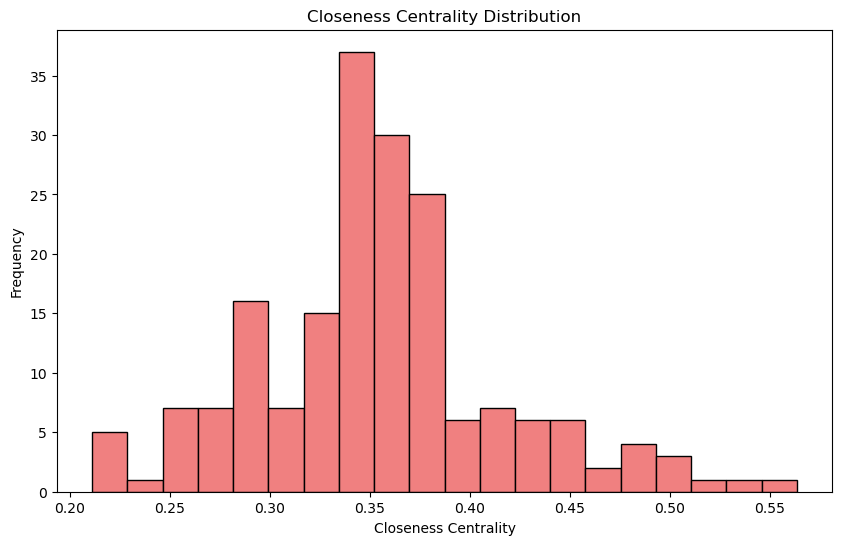

In [24]:
# Plotting Closeness Centrality Distribution
plt.figure(figsize=(10, 6))
plt.hist(closeness_values, bins=20, color='lightcoral', edgecolor='black')
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.show()

# The histogram show's the distribution of  “Closeness centrality Distribution” in a network. 
# Closeness centrality Distribution is a measure of how often a node falls on the central path between two other nodes. 
# In simpler terms, it measures how important a particular node is for connecting other nodes in the network.
# The x-axis of the histogram represents the value of “Closeness centrality Distribution” and the 
# y-axis represents the frequency. 
# The height of each bar shows how many nodes have a certain “Closeness centrality Distribution” value.
# For instance, in this histogram, it looks like there are more nodes with a “Closeness centrality Distribution” 
# value between 0.30 and 0.40 than any other range.
# Overall, the histogram helps visualize the distribution of “Closeness centrality Distribution” in the network.

In [25]:
# Computing Closeness Centrality Statistics
closeness_range = max(closeness_values) - min(closeness_values)
closeness_mean = sum(closeness_values) / len(closeness_values)
closeness_median = pd.Series(closeness_values).median()

print(f"Closeness Centrality Range: {closeness_range}")
print(f"Closeness Centrality Mean: {closeness_mean}")
print(f"Closeness Centrality Median: {closeness_median}")

Closeness Centrality Range: 0.3525126405943659
Closeness Centrality Mean: 0.3541926157937753
Closeness Centrality Median: 0.34896810506566606


# 18.Density, Degree and mean degree

In [26]:
# Computing density of all 5 networks
i=0
for data in books:
    i = i + 1
    density = nx.density(data)
    print(f"Density of graph {i} is {density}")

Density of graph 1 is 0.03933068828704502
Density of graph 2 is 0.02319595342851157
Density of graph 3 is 0.02203134220706839
Density of graph 4 is 0.01823480655597444
Density of graph 5 is 0.015173900890468394


In [27]:
# Compute degree of each node for all graph
i = 0
for data in books:
    i = i + 1
    degree = data.degree()
    print(f"The degree of each node in garph {i} is {degree}")
    

The degree of each node in garph 1 is [('Addam-Marbrand', 2), ('Jaime-Lannister', 29), ('Tywin-Lannister', 22), ('Aegon-I-Targaryen', 2), ('Daenerys-Targaryen', 21), ('Eddard-Stark', 66), ('Aemon-Targaryen-(Maester-Aemon)', 7), ('Alliser-Thorne', 10), ('Bowen-Marsh', 5), ('Chett', 3), ('Clydas', 1), ('Jeor-Mormont', 13), ('Jon-Snow', 37), ('Samwell-Tarly', 12), ('Aerys-II-Targaryen', 6), ('Brandon-Stark', 6), ('Gerold-Hightower', 5), ('Jon-Arryn', 15), ('Robert-Baratheon', 50), ('Aggo', 6), ('Drogo', 19), ('Jhogo', 6), ('Jorah-Mormont', 13), ('Quaro', 5), ('Rakharo', 5), ('Albett', 3), ('Halder', 8), ('Rast', 6), ('Grenn', 7), ('Pypar', 7), ('Tyrion-Lannister', 46), ('Alyn', 5), ('Harwin', 4), ('Jory-Cassel', 21), ('Tomard', 7), ('Arthur-Dayne', 1), ('Arya-Stark', 27), ('Benjen-Stark', 14), ('Bran-Stark', 32), ('Catelyn-Stark', 43), ('Cersei-Lannister', 30), ('Desmond', 2), ('Ilyn-Payne', 9), ('Jeyne-Poole', 6), ('Joffrey-Baratheon', 30), ('Meryn-Trant', 9), ('Mordane', 11), ('Mycah', 

In [28]:
# Computing mean degrees for all graph
i = 0
for data in books:
    i = i + 1
    n = len(list(data.nodes))
    mean_degree = sum(dict(data.degree()).values())/n
    print(f"The mean degree of graph {i} is {mean_degree}")

The mean degree of graph 1 is 7.315508021390374
The mean degree of graph 2 is 5.984555984555985
The mean degree of graph 3 is 6.653465346534653
The mean degree of graph 4 is 4.978102189781022
The mean degree of graph 5 is 4.794952681388013


# 19.Cliques and  k-core

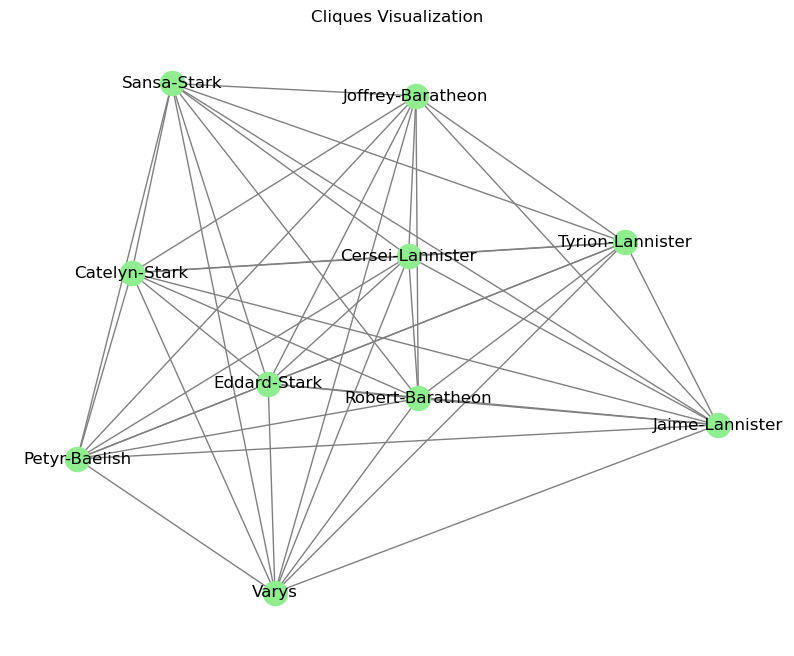

In [29]:
import matplotlib.pyplot as plt
import networkx as nx

# Find Cliques for graph 1 (book 1)
cliques = list(nx.find_cliques(books[0]))

# Visualize cliques
plt.figure(figsize=(10, 8))
ax = plt.gca()  # Get the current axes
nx.draw(books[0].subgraph(max(cliques, key=len)), with_labels=True, node_color='lightgreen', node_size=300, edge_color='gray', ax=ax)
plt.title('Cliques Visualization')
plt.show()

# 20.Degree Distrubution of all 5 books

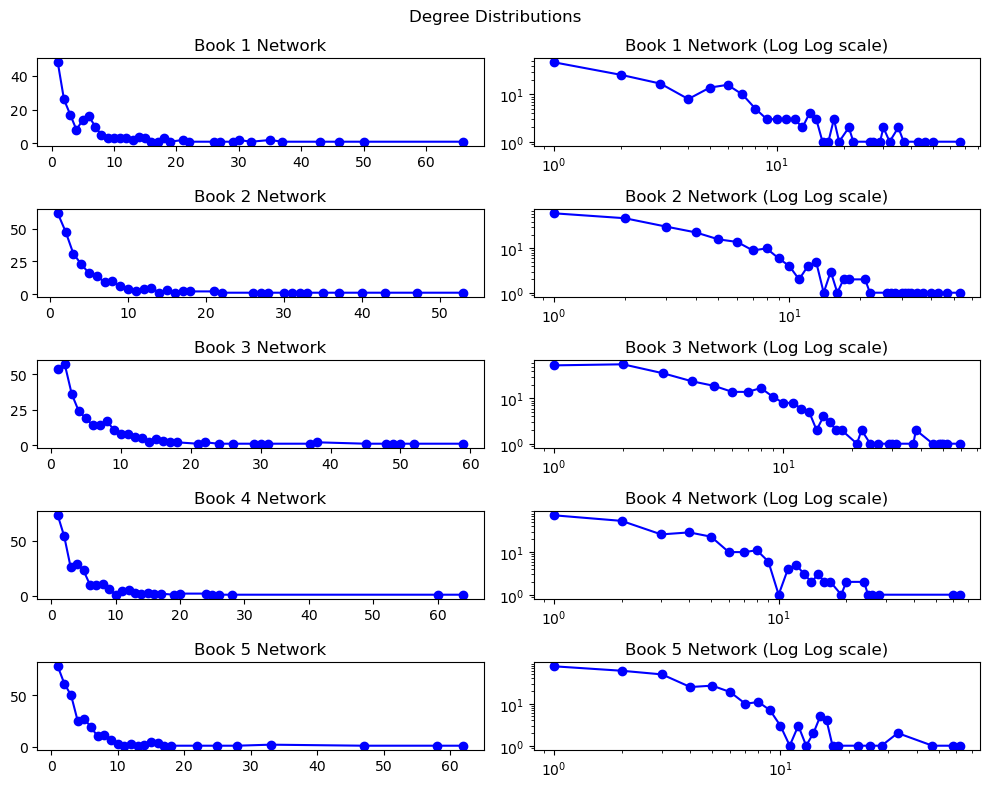

In [30]:
fig, axs = plt.subplots(5,2)
fig.suptitle('Degree Distributions')

# Degree Distribution of book 1
degree1 = dict(nx.degree(books[0]))
deg_seq1 = sorted(set(degree1.values()), reverse=True)
hist1 = [list(degree1.values()).count(x) for x in deg_seq1]

axs[0,0].plot(deg_seq1, hist1, 'b', marker='o')
axs[0,0].set_title('Book 1 Network')
axs[0,1].loglog(deg_seq1, hist1, 'b', marker='o')
axs[0,1].set_title('Book 1 Network (Log Log scale)')

# Degree Distribution of book 2
degree2 = dict(nx.degree(books[1]))
deg_seq2 = sorted(set(degree2.values()), reverse=True)
hist2 = [list(degree2.values()).count(x) for x in deg_seq2]

axs[1,0].plot(deg_seq2, hist2, 'b', marker='o')
axs[1,0].set_title('Book 2 Network')
axs[1,1].loglog(deg_seq2, hist2, 'b', marker='o')
axs[1,1].set_title('Book 2 Network (Log Log scale)')

# Degree Distribution of book 3
degree3 = dict(nx.degree(books[2]))
deg_seq3 = sorted(set(degree3.values()), reverse=True)
hist3 = [list(degree3.values()).count(x) for x in deg_seq3]

axs[2,0].plot(deg_seq3, hist3, 'b', marker='o')
axs[2,0].set_title('Book 3 Network')
axs[2,1].loglog(deg_seq3, hist3, 'b', marker='o')
axs[2,1].set_title('Book 3 Network (Log Log scale)')

# Degree Distribution of book 4
degree4 = dict(nx.degree(books[3]))
deg_seq4 = sorted(set(degree4.values()), reverse=True)
hist4 = [list(degree4.values()).count(x) for x in deg_seq4]

axs[3,0].plot(deg_seq4, hist4, 'b', marker='o')
axs[3,0].set_title('Book 4 Network')
axs[3,1].loglog(deg_seq4, hist4, 'b', marker='o')
axs[3,1].set_title('Book 4 Network (Log Log scale)')

# Degree Distribution of book 5
degree5 = dict(nx.degree(books[4]))
deg_seq5 = sorted(set(degree5.values()), reverse=True)
hist5 = [list(degree5.values()).count(x) for x in deg_seq5]

axs[4,0].plot(deg_seq5, hist5, 'b', marker='o')
axs[4,0].set_title('Book 5 Network')
axs[4,1].loglog(deg_seq5, hist5, 'b', marker='o')
axs[4,1].set_title('Book 5 Network (Log Log scale)')


fig.set_size_inches(10,8)
fig.tight_layout()